In [110]:
'''
Regina Catipon
MACS 30100
2/29/2020
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression, ElasticNetCV, ElasticNet 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc

#from sklearn.inspection import plot_partial_dependence

# <span style="color: blue">Conceptual: Cost functions for classification trees

<span style="color: blue">1. (15 points) Consider the Gini index, classification error, and cross-entropy in simple classification settings with two classes. Of these three possible cost functions, which would be best to use when growing a decision tree? Which would be best to use when pruning a decision tree? Why?

Because classification error is simply the fraction of misclassified training observations it is not sensitive enough for tree growing. The other two impurity measures, the Gini index and cross-entropy are considered to be best because they control for variance across the classes which helps to optimize splitting for growth. For pruning, classifcation error is considered to be an appropriate measure because it prioritizes accuracy.


# <span style="color: blue">Application: Predicting attitudes towards racist college professors

## <span style="color: blue">Estimate the models
<span style="color: blue">2. (35 points; 5 points/model) Estimate the following models, predicting colrac using the training set (the training .csv) with 10-fold CV:
    - Logistic regression
    - Naive Bayes
    - Elastic net regression
    - Decision tree (CART)
    - Bagging
    - Random forest
    - Boosting

<span style="color: blue">Tune the relevant hyperparameters for each model as necessary. Only use the tuned model with the best performance for the remaining exercises. Be sure to leave sufficient time for hyperparameter tuning. Grid searches can be computationally taxing and take quite a while, especially for tree-aggregation methods.

In [86]:
#load data
train = pd.read_csv("./data/gss_train.csv")
test = pd.read_csv("./data/gss_test.csv")

In [42]:
#inspect
train.head()
#don't have to check for nulls because of preprocessinh

,age,attend,authoritarianism,black,born,childs,colath,colrac,colcom,colmil,...,partyid_3_Ind,partyid_3_Rep,relig_CATHOLIC,relig_NONE,relig_other,social_cons3_Mod,social_cons3_Conserv,spend3_Mod,spend3_Liberal,zodiac_other
0,21,0,4,0,0,0,1,1,0,1,...,1,0,1,0,0,1,0,0,0,1
1,42,0,4,0,0,2,0,1,1,0,...,1,0,0,0,0,0,0,1,0,1
2,70,1,1,1,0,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,35,3,2,0,0,2,0,1,0,1,...,1,0,0,0,1,0,0,0,1,1
4,24,3,6,0,1,3,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [16]:
# dropping colrac column and set predictors
X_train = train.drop(['colrac'], axis=1)
X_test = test.drop(['colrac'], axis=1)

#setting prediction output to colrac
y_train, y_test = train['colrac'], test['colrac']

# <span style="color: blue"> Logistic regression

In [85]:

log_reg = LogisticRegression()

log_score = cross_val_score(log_reg, X_train, 
                           y_train, scoring = 'roc_auc', cv = 10)
log_roc = np.mean(log_score)


log_accu = cross_val_score(naive_bayes, X_train, 
                           y_train, scoring = 'accuracy', cv = 10)
log_err = np.mean(log_accu)

print("AUC/ROC", log_roc)
print("Error", log_err)

/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

AUC/ROC 0.8703107556427476
Error 0.7344474902240962


# <span style="color: blue">Naive Bayes

In [99]:

naive_bayes = GaussianNB()

#AUC
nb_score = cross_val_score(naive_bayes, X_train, 
                           y_train, scoring = 'roc_auc', cv = 10)
nb_roc = np.mean(nb_score)

#
nb_accu = cross_val_score(naive_bayes, X_train, 
                           y_train, scoring = 'accuracy', cv = 10)
nb_err = np.mean(nb_accu)

print("AUC/ROC", nb_roc)
print("Accuracy", nb_err)

AUC/ROC 0.8080500250922787
Accuracy 0.7344474902240962


#  <span style="color: blue"> Elasticnet Regression

In [87]:
#Elastic net regression

elas = ElasticNetCV(cv=10)
elas.fit(X_train, y_train)

# have to tune alpha and l1
print( elas.alpha_, elas.l1_ratio)


0.0038452641680228584 0.5


In [41]:
#using that alpha and l1 ratio
elas_best = ElasticNet(alpha = 0.0038452641680228584, l1_ratio=0.5)

# is MSE best?
elas_score = cross_val_score(elas_best, X_train, y_train,
                          scoring = 'neg_mean_squared_error', cv=10)
elas_mse = np.mean(elas_score)

#AUC/ROC
elas_score = cross_val_score(elas_best, X_train, y_train,
                          scoring = 'roc_auc', cv=10)
elas_roc = np.mean(elas_roc)

print("AUC/ROC", elas_roc)
print("MSE", -1*elas_mse)

AUC/ROC 0.8740225489138439
MSE 0.1471453221731916


#  <span style="color: blue"> Decison Tree (CART)

In [98]:


decision_tree = DecisionTreeClassifier()

#AUC/ROC
dt_score = cross_val_score(decision_tree, X_train, y_train,
                          scoring = 'roc_auc', cv=10)
dt_roc = np.mean(dt_score)

#Error
dt_accu = cross_val_score(decision_tree, X_train, y_train,
                          scoring = 'accuracy', cv=10)
dt_err = np.mean(dt_accu)

#roc a bye baby
print("AUC/ROC", dt_roc)
print("Accuracy", dt_err)

AUC/ROC 0.7217232298218214
Accuracy 0.7174588881444107


#  <span style="color: blue"> Bagging

In [47]:
#Bagging, but what is the base?
bagging = BaggingClassifier()

param_grid = {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}

#Gridsearch?
search = GridSearchCV(estimator = bagging, param_grid = param_grid,
                      cv = 10, n_jobs=-1, verbose = 2)
search.fit(X_train, y_train)
search.best_params_

#results = model_selection.cross_val_score(bagging, X_train, y_train, cv = search)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    9.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.2s finished


{'n_estimators': 30}

In [48]:
# taking those number of estimators
bagging_best = BaggingClassifier(n_estimators=30)

In [97]:
#AUC/ROC
bag_score = cross_val_score(bagging_best, X_train, y_train,
                          scoring = 'roc_auc', cv=10)
bag_roc = np.mean(bag_score)

#Error
bag_accu = cross_val_score(bagging_best, X_train, y_train,
                          scoring = 'accuracy', cv=10)
bag_err = np.mean(bag_accu)

#roc a bye baby
print("AUC/ROC", bag_roc)
print("Accuracy", bag_err)

AUC/ROC 0.8705380367452802
Accuracy 0.7818464643248919


#  <span style="color: blue"> Random Forest

In [55]:
random_forest = RandomForestClassifier()

param_grid = {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 
              'max_features':[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              'max_depth': [2, 4, 6, 8],
             }

#GridSearch
search_randf = GridSearchCV(estimator = random_forest, param_grid = param_grid,
                      cv = 10, n_jobs=-1, verbose = 2)
search_randf.fit(X_train, y_train)
search_randf.best_params_


Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 1972 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2862 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3916 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  3.3min finished


{'max_depth': 8, 'max_features': 25, 'n_estimators': 35}

In [96]:
random_forest_best = RandomForestClassifier(max_depth= 8, max_features= 25, n_estimators=35)

#AUC/ROC
rf_score = cross_val_score(random_forest_best, X_train, y_train,
                          scoring = 'roc_auc', cv=10)
rf_roc = np.mean(rf_score)

#Error
rf_accu = cross_val_score(bagging_best, X_train, y_train,
                          scoring = 'accuracy', cv=10)
rf_err = np.mean(rf_accu)

#roc a bye baby
print("AUC/ROC", rf_roc)
print("Accuracy", rf_err)

AUC/ROC 0.8798170843241266
Accuracy 0.7750302007253109


In [59]:
X_train.shape

(1476, 55)

#  <span style="color: blue"> Gradient Boosting

In [78]:

gradient = GradientBoostingClassifier()

param_grid = { 'max_features': [10,20,30,40,50],
              'learning_rate': [.2,.4,.6,.8,1],
              'n_estimators': [10,20,30,40,50]
             }

    
gradient_search = GridSearchCV(estimator =gradient, param_grid = param_grid,
                              cv = 10, n_jobs = -1, verbose = 2)

#fit the model
gradient_search.fit(X_train,y_train)

gradient_search.best_params_

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 245 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 651 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 1217 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 1243 out of 1250 | elapsed:   56.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:   56.8s finished


{'learning_rate': 0.2, 'max_features': 30, 'n_estimators': 40}

In [80]:
gradient_best = GradientBoostingClassifier(learning_rate = 0.2, 
                                           max_features = 30,
                                          n_estimators = 40)

In [100]:
#AUC/ROC
gradient_score = cross_val_score(gradient_best, X_train, y_train,scoring = 'roc_auc')
gradient_roc = np.mean(gradient_score)

#Error
gradient_accu = cross_val_score(gradient_best, X_train, y_train,scoring = 'accuracy')
gradient_err = np.mean(gradient_accu)

#roc a bye baby
print("AUC/ROC", gradient_roc)
print("Accuracy", gradient_err)

/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


AUC/ROC 0.8689044470809119
Accuracy 0.7845701510414426


## <span style="color: blue">Evaluate the models
<span style="color: blue">3. (20 points) Compare and present each model's (training) performance based on
    - Cross-validated error rate 
    - ROC/AUC


In [154]:
#CV-error rate

err_rates = [(1 - log_err), (1 -nb_err), (-1*elas_mse), 
             (1 -dt_err), (1 -bag_err), (1 -rf_err), (1 -gradient_err)]
model_names = ['log_err', 'nb_err', 'elas_mse', 'dt_err', 
               'bag_err', 'rf_err', 'gradient_err']

Text(0.5, 1.0, 'Cross-Validated Error Rates')

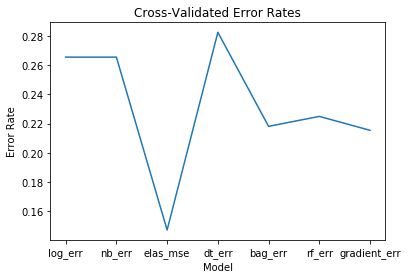

In [153]:
#Graph
plt.plot(model_names,err_rates) 
plt.xlabel('Model')
plt.ylabel('Error Rate')
plt.title('Cross-Validated Error Rates')

In [ ]:
#Graph AUC/ROC comparison

In [94]:
#Plot the models error rates


 <span style="color: blue">4.(15 points) Which is the best model? Defend your choice.


In [147]:
def plot_ROC(model):
    aucVals = []
    #Get the ROC curve
    model.fit(X_train,y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
    auc = metrics.auc(fpr, tpr)
    aucVals.append(auc)

    #setup axis for plotting
    fig, ax = plt.subplots(figsize = (10,10))
    #Plot the class's line
    ax.plot(fpr, tpr, auc)

    #display
    ax.set_title('Receiver Operating Characteristicsfor')
    plt.plot([0,1], [0,1], color = 'k', linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    plt.show()
    plt.close()
    #return aucVals


Random Forest


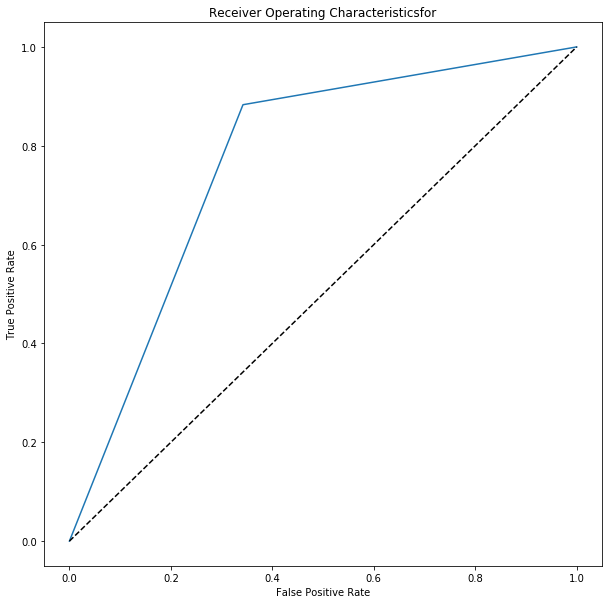

In [149]:
#Graph ROC/AUC
print('')
print('Random Forest')
plot_ROC(random_forest_best)


The model that did the best was the Random Forest classifier. It scored an AUC/ROC rate of 0.879. While simpler models like Logistic Regression actually scored pretty close with 0.870, Random Forest also had one of the highest accuracy scores, second only to the Gradient Boosting in clssification error rate. 

##  <span style="color: blue">Evaluate the best model
 <span style="color: blue">5. (15 points) Evaluate the final, best model's (selected in 4) performance on the test set (the test .csv) by calculating and presenting the classification error rate and AUC. Compared to the fit evaluated on the training set in questions 3-4, does the "best" model generalize well? Why or why not? How do you know?


In [91]:
random_forest_best.fit(X_train, y_train)
pred = random_forest_best.predict(X_test)

In [95]:
#Accuracy
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.7971602434077079


In [93]:
#ROC/AUC
roc = roc_auc_score(y_test, pred)
print(roc)

0.788356504468719


I think the model does an average job at generalizing. For example, the Naive Bayes classification, which is sometimes used as a baseline, had a ROC/AUC of 0.81 and an accuracy of 0.73. The ROC/AUC from the predicted y using the tuned Random Forest classification model was a little lower than the Naive Bayes rate at 0.79, and an accuracy score was a little higher than . It, of course, did not outperform the training results, but its accuracy was close to, if not sometimes better, than the training set fits.

## Bonus: PDPs/ICE
6. (Up to 5 extra points) Present and substantively interpret the "best" model (selected in question 4) using PDPs/ICE curves over the range of: tolerance and age. Note, interpretation must be more than simple presentation of plots/curves. You must sufficiently describe the changes in probability estimates over the range of these two features. You may earn up to 5 extra points, where partial credit is possible if the solution is insufficient along some dimension (e.g., technically/code, interpretation, visual presentation, etc.).